In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
import string 
import nltk 
from nltk.corpus import stopwords
from wordcloud import WordCloud 

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\BEST
[nltk_data]     LAPTOP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [6]:
import tensorflow as tf

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [9]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('mail.csv')

In [12]:
df.sample(5)

,Unnamed: 0,label,text,label_num
2598,3246,ham,Subject: texaco 4 / 01\r\ni have a price discr...,0
3587,1971,ham,Subject: revision # 1 - hpl noms for november ...,0
309,2168,ham,Subject: heads - up - tenaska iv partner ltd ....,0
399,2892,ham,Subject: aep - hpl transition issues\r\nattach...,0
3837,4051,spam,Subject: re : cc : get your meds overnmght .\r...,1


In [13]:
df.shape

(5171, 4)

In [20]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [15]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


## Plot Label to check the number of cat

<Axes: xlabel='label', ylabel='count'>

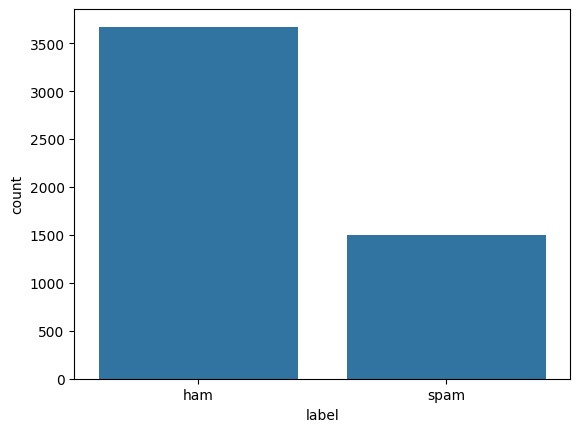

In [17]:
sns.countplot(data = df , x = 'label')

## Balance the Dataset 

In [24]:
ham_data = df[df['label'] == 'ham']
spam_data = df[df['label'] == 'spam']

In [26]:
ham_data_balanced = ham_data.sample(n = len(spam_data) , random_state = 42)

In [31]:
balanced_df = pd.concat((spam_data , ham_data_balanced )).reset_index(drop=True)

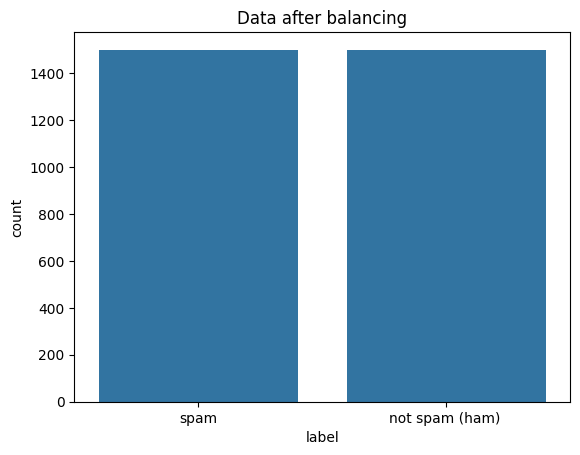

In [34]:
sns.countplot(data = balanced_df , x = 'label')
plt.title("Data after balancing")
plt.xticks(ticks = [0,1] , labels = ['spam' , 'not spam (ham) '])
plt.show()


## Clean text

In [36]:
balanced_df['text'] = balanced_df['text'].str.replace('Subject:' , '')

In [39]:
punctuations_list = string.punctuation

In [40]:
def remove_punctuation(text):
    temp = str.maketrans('','',punctuations_list)
    return text.translate(temp)

In [43]:
balanced_df['text'] = balanced_df['text'].apply(lambda x : remove_punctuation(x))


,Unnamed: 0,label,text,label_num
0,4685,spam,photoshop windows office cheap main trend...,1
1,4185,spam,looking for medication we re the best sourc...,1
2,4922,spam,vocable rnd word asceticism\r\nvcsc brand ...,1
3,3799,spam,report 01405 \r\nwffur attion brom est inst s...,1
4,3948,spam,vic odin n ow\r\nberne hotbox carnal bride ...,1


## Remove stop words  

In [68]:
def remove_stopwords(text):
    sw = stopwords.words('english')
    imp_word = []
    for ch in str(text).split():
        ch = ch.lower()
        if ch not in sw:
            imp_word.append(ch)
    output = ' '.join(imp_word)    
    return output

In [69]:
balanced_df['text'] = balanced_df['text'].apply(lambda x: remove_stopwords(x) )
balanced_df.head()

,Unnamed: 0,label,text,label_num
0,4685,spam,photoshop windows office cheap main trending a...,1
1,4185,spam,looking medication best source difficult make ...,1
2,4922,spam,vocable rnd word asceticism vcsc brand new sto...,1
3,3799,spam,report 01405 wffur attion brom est inst siupie...,1
4,3948,spam,vic odin n ow berne hotbox carnal bride cutwor...,1


## Word Cloud

In [76]:
def plot_word_cloud(data , typ):
    email_corpus = ' '.join(data['text'])
    wc = WordCloud(background_color = 'black' , max_words=100, width=800, height=400).generate(email_corpus)
    plt.figure(figsize = (7,7))
    plt.title(f"cloud for {typ}" , fontsize = 14)
    plt.imshow(wc , interpolation='bilinear')
    plt.axis('off')
    plt.show()

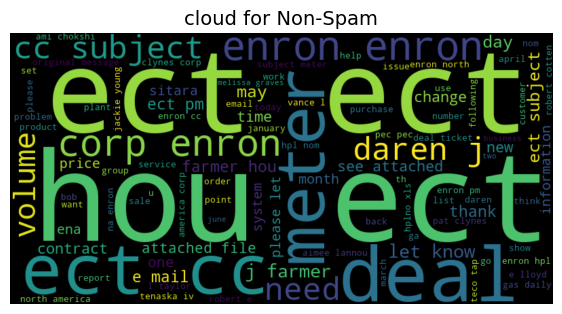

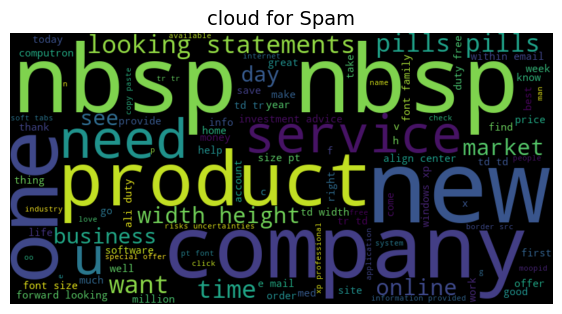

In [77]:
plot_word_cloud(balanced_df[balanced_df['label'] == 'ham'], typ='Non-Spam')
plot_word_cloud(balanced_df[balanced_df['label'] == 'spam'], typ='Spam')

In [78]:
balanced_df.head()

,Unnamed: 0,label,text,label_num
0,4685,spam,photoshop windows office cheap main trending a...,1
1,4185,spam,looking medication best source difficult make ...,1
2,4922,spam,vocable rnd word asceticism vcsc brand new sto...,1
3,3799,spam,report 01405 wffur attion brom est inst siupie...,1
4,3948,spam,vic odin n ow berne hotbox carnal bride cutwor...,1


In [80]:
X_train , X_test , y_train , y_test = train_test_split(balanced_df['text'] , balanced_df['label'] , test_size = 0.2 )

In [81]:
tokenizer = Tokenizer()

In [83]:
tokenizer.fit_on_texts(X_train)

In [84]:
trains_sequences = tokenizer.texts_to_sequences(X_train)
tests_sequences = tokenizer.texts_to_sequences(X_test)

In [87]:
max_len = 100 
trains_sequences = pad_sequences(trains_sequences , maxlen= max_len , padding = 'post' , truncating = 'post')
tests_sequences = pad_sequences(tests_sequences , maxlen= max_len , padding = 'post' , truncating = 'post')
y_train =(y_train == 'spam').astype(int) 
y_test =(y_test == 'spam').astype(int) 

## Model

In [88]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_len),
    tf.keras.layers.LSTM(16),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [92]:
es = EarlyStopping(patience=3, monitor='val_accuracy', restore_best_weights=True)
lr = ReduceLROnPlateau(patience=2, monitor='val_loss', factor=0.5, verbose=0)

history = model.fit(
    trains_sequences, y_train,
    validation_data=(tests_sequences, y_test),
    epochs=20,
    batch_size=32,
    callbacks=[lr, es]
)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - accuracy: 0.5279 - loss: 0.6917 - val_accuracy: 0.5667 - val_loss: 0.6864 - learning_rate: 0.0010
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.8119 - loss: 0.4139 - val_accuracy: 0.9117 - val_loss: 0.2806 - learning_rate: 0.0010
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.9708 - loss: 0.1295 - val_accuracy: 0.9550 - val_loss: 0.1942 - learning_rate: 0.0010
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.9875 - loss: 0.0668 - val_accuracy: 0.9483 - val_loss: 0.2310 - learning_rate: 0.0010
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.9921 - loss: 0.0474 - val_accuracy: 0.9467 - val_loss: 0.2511 - learning_rate: 0.0010
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.9929 - loss: 0.0426 - val_accuracy: 0.9450 - val_loss: 0.2662 - learning_rate: 5.0000e-04


In [93]:
test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)

NameError: name 'test_sequences' is not defined

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()